# Preliminary Data Exploration

### Sleep Data

**1. Verify the Structure**

The data about sleep is divided into two different datasets. For each day, we have two datasets: the first one collects data about the heart rate values during sleep, the second one collects data about different stages during sleep. Let's see an example.

Sample day: 2024-12-27

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns

In [2]:
sample_day = '2024-12-27'

stages_sleep_directory = "../../data/raw/sleep/stages"
heart_rates_sleep_directory = "../../data/raw/sleep/heart_rates"

stages_sleep = pd.read_csv(os.path.join(stages_sleep_directory, f"{sample_day}.csv"))
heart_rates_sleep = pd.read_csv(os.path.join(heart_rates_sleep_directory, f"{sample_day}.csv"))

In [3]:
stages_sleep.head()

,start_time,end_time,sleep_stage
0,00:59,01:03,Light
1,01:03,01:24,Deep
2,01:24,01:29,Light
3,01:29,01:35,Deep
4,01:35,02:41,Light


In [4]:
heart_rates_sleep.head()

,heart_rate,timestamp
0,54,00:58
1,53,01:00
2,53,01:02
3,54,01:04
4,54,01:06


From this quick analysis, we can see that there was an error in data collection. 
`timestamp` column and `heart_rate` column are reversed.

The goal is to obtain a unique dataset for each day that joins the two datasets. Let's see an example.

In [5]:
data = {
    'timestamp': ['00:58', '01:00', '01:02', '01:04', '01:06'],
    'heart_rate': [54, 53, 53, 54, 54],
    'sleep_stage': ['Deep', 'Deep', 'Deep', 'Deep', 'Light']
}
goal_df = pd.DataFrame(data)

goal_df.head()

,timestamp,heart_rate,sleep_stage
0,00:58,54,Deep
1,01:00,53,Deep
2,01:02,53,Deep
3,01:04,54,Deep
4,01:06,54,Light


Let's remove all the files that are not relevant to our analysis (e.g., '2025-01-07.csv')

In [6]:
def remove_not_relevant_files(directory):
    for f in os.listdir(directory):
        if f.endswith(".csv"):
            date = f.split(".")[0]
            year, month, day = int(date.split("-")[0]), int(date.split("-")[1]), int(date.split("-")[2])
            if year >= 2025 and month >= 1 and day > 6:
                file_path = os.path.join(directory, f)
                os.remove(file_path)
                print(f"File removed: {file_path}")

remove_not_relevant_files(stages_sleep_directory)
remove_not_relevant_files(heart_rates_sleep_directory)

Fix the error in heart rate datasets. Reverse the columns (see above for more details about the error).

In [39]:
def reverse_columns(directory):
    for f in os.listdir(directory):
        if f.endswith(".csv"):
            file_path = os.path.join(directory, f)
            df = pd.read_csv(file_path)

            df = df.rename(columns={'timestamp': 'heart_rate', 'heart_rate': 'timestamp'})

            df.to_csv(file_path, index=False)
            print("File saved successfully")

# reverse_columns(heart_rates_sleep_directory)

File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully
File saved successfully


Verify if the error has been correctly fixed by picking up a datasets from `sleep/heart_rates` directory randomly.

In [7]:
files = [os.path.join(heart_rates_sleep_directory, f) for f in os.listdir(heart_rates_sleep_directory)]

random_file = random.choice(files)

random_df = pd.read_csv(random_file)
random_df.head()

,heart_rate,timestamp
0,52,00:44
1,51,00:46
2,51,00:48
3,52,00:50
4,52,00:52


The error has been successfully fixed.

##### 2. Identify Missing Values

2.1) Check for NaN values for all datasets

In [9]:
def check_for_nan_values(directory):
    counter = {}
    for f in os.listdir(directory):
        if f.endswith(".csv"):
            file_path = os.path.join(directory, f)
            df = pd.read_csv(file_path)

            missing_values = df.isnull().sum().to_dict()

            missing_values['total'] = sum(missing_values.values())

            counter[f] = missing_values

    return counter

In [10]:
heart_rate_sleep_nan_counter = check_for_nan_values(heart_rates_sleep_directory)
for f, report in heart_rate_sleep_nan_counter.items():
    print(f)
    print("\n")
    for key, value in report.items():
        print(key, ' --> ', value)
    print("\n")
    print("-"*40+"\n")

2024-12-22.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-23.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-24.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-25.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-26.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-27.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-28.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-29.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------------

2024-12-30.csv


heart_rate  -->  0
timestamp  -->  0
total  -->  0


----------------------------------

In [43]:
stages_sleep_nan_counter = check_for_nan_values(stages_sleep_directory)
for f, report in stages_sleep_nan_counter.items():
    print(f)
    print("\n")
    for key, value in report.items():
        print(key, ' --> ', value)
    print("\n")
    print("-"*40+"\n")

2024-12-22.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->  0


----------------------------------------

2024-12-23.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->  0


----------------------------------------

2024-12-24.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->  0


----------------------------------------

2024-12-25.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->  0


----------------------------------------

2024-12-26.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->  0


----------------------------------------

2024-12-27.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->  0


----------------------------------------

2024-12-28.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->  0


----------------------------------------

2024-12-29.csv


start_time  -->  0
end_time  -->  0
sleep_stage  -->  0
total  -->

No missing value (NaN) found.

2.2) For each sleep stages dataset, identify if a time slot is missed. 

Example:
01:07,01:36,Deep
01:45,01:59,Light

In the case above, the time slot `01:36` to `01:45` is missed.

In [11]:
def check_missing_time_slots(directory):
    missing_slots_report = {}

    for file in os.listdir(directory):
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)

            df['start_time'] = pd.to_datetime(df['start_time'], format='%H:%M')
            df['end_time'] = pd.to_datetime(df['end_time'], format='%H:%M')

            missing_slots = []

            for i in range(len(df) - 1):
                current_end = df.loc[i, 'end_time']
                next_start = df.loc[i + 1, 'start_time']
                if current_end != next_start:
                    missing_slots.append(f"{current_end.strftime('%H:%M')} to {next_start.strftime('%H:%M')}")

            missing_slots_report[file] = missing_slots if missing_slots else "No missing slots"
    return missing_slots_report

In [12]:
missing_slots_report = check_missing_time_slots(stages_sleep_directory)

for file, missing_slots in missing_slots_report.items():
    print(f"File: {file}")
    if missing_slots == "No missing slots":
        print("No missing slots.")
    else:
        print("Missing slots:")
        for slot in missing_slots:
            print(f"  - {slot}")
    print("-" * 40)

File: 2024-12-22.csv
No missing slots.
----------------------------------------
File: 2024-12-23.csv
No missing slots.
----------------------------------------
File: 2024-12-24.csv
No missing slots.
----------------------------------------
File: 2024-12-25.csv
No missing slots.
----------------------------------------
File: 2024-12-26.csv
No missing slots.
----------------------------------------
File: 2024-12-27.csv
No missing slots.
----------------------------------------
File: 2024-12-28.csv
No missing slots.
----------------------------------------
File: 2024-12-29.csv
No missing slots.
----------------------------------------
File: 2024-12-30.csv
No missing slots.
----------------------------------------
File: 2024-12-31.csv
No missing slots.
----------------------------------------
File: 2025-01-02.csv
No missing slots.
----------------------------------------
File: 2025-01-03.csv
No missing slots.
----------------------------------------
File: 2025-01-04.csv
No missing slots.
-

No missing slot has been founded.

2.3) Calculate the completeness for each heart rates sleep dataset

This function evaluates the completeness of heart rate datasets during sleep by comparing the expected number of entries (based on sleep duration) with the actual entries. Completeness is expressed as a percentage.

In [13]:
def calculate_dataset_completeness(stages_directory, heart_rates_directory):
    completeness_report = {}
    
    for stages_file in os.listdir(stages_directory):
        if stages_file.endswith('.csv'):
            stages_path = os.path.join(stages_directory, stages_file)
            heart_rates_path = os.path.join(heart_rates_directory, stages_file)
            
            stages_df = pd.read_csv(stages_path)
            heart_rates_df = pd.read_csv(heart_rates_path)

            start_time = None
            end_time = None

            start_time_values = stages_df['start_time']
            for idx, value in start_time_values.items():
                if idx == 0:
                    start_time = value

            end_time_values = stages_df['end_time']
            for idx, value in end_time_values.items():
                if idx == len(stages_df)-1:
                    end_time = value
            
            start_time = pd.to_datetime(start_time, format='%H:%M')
            end_time = pd.to_datetime(end_time, format='%H:%M')

            day = stages_file.split('.')[0]
            
            if start_time is not None and end_time is not None:
                total_sleep_minutes = (end_time - start_time).seconds // 60  # Total sleep minutes
                
                # Number of expected rows
                expected_rows = total_sleep_minutes // 2
                
                # Completeness
                actual_rows = len(heart_rates_df)
                completeness_percentage = int((actual_rows / expected_rows) * 100)
                
                completeness_report[day] = completeness_percentage
            else:
                completeness_report[day] = "No data available"
    
    return completeness_report

# Example
completeness_report = calculate_dataset_completeness(stages_sleep_directory, heart_rates_sleep_directory)

for day, completeness in completeness_report.items():
    print(f"{day}: {completeness}")

2024-12-22: 100
2024-12-23: 100
2024-12-24: 100
2024-12-25: 100
2024-12-26: 100
2024-12-27: 100
2024-12-28: 100
2024-12-29: 100
2024-12-30: 100
2024-12-31: 100
2025-01-02: 100
2025-01-03: 100
2025-01-04: 100
2025-01-05: 100
2025-01-06: 100


In [14]:
# remove datasets with no data
file1 = '2024-12-21.csv'
file2 = '2025-01-01.csv'

file_paths_to_remove = [
    os.path.join(stages_sleep_directory, file1),
    os.path.join(stages_sleep_directory, file2),
    os.path.join(heart_rates_sleep_directory, file1),
    os.path.join(heart_rates_sleep_directory, file2)
]

for path in file_paths_to_remove:
    if os.path.exists(path):
        os.remove(path)
        print(f"File deleted: {path}")

##### 3. Identify and Handle Outliers

3.1) Identify Outliers in Sleep Stages Dataset <br>
     Here the strategy is: verify that the `sleep_stage` column contains only these values: `REM`, `Deep`, `Light`, `Awake`

In [15]:
def identify_outliers_sleep_stages(directory):
    valid_stages = {"Awake".lower(), "REM".lower(), "Deep".lower(), "Light".lower()}
    outliers_report = {}

    for file in os.listdir(directory):
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)

            df['sleep_stage'] = df['sleep_stage'].apply(lambda x: x.lower())

            outliers = df[~df['sleep_stage'].isin(valid_stages)]
            outliers_report[file] = len(outliers)

    return outliers_report

In [16]:
outliers_sleep_stages = identify_outliers_sleep_stages(stages_sleep_directory)

for df, value in outliers_sleep_stages.items():
    print(df + ' --> ' + str(value) + ' outliers.')

2024-12-22.csv --> 0 outliers.
2024-12-23.csv --> 0 outliers.
2024-12-24.csv --> 0 outliers.
2024-12-25.csv --> 0 outliers.
2024-12-26.csv --> 0 outliers.
2024-12-27.csv --> 0 outliers.
2024-12-28.csv --> 0 outliers.
2024-12-29.csv --> 0 outliers.
2024-12-30.csv --> 0 outliers.
2024-12-31.csv --> 0 outliers.
2025-01-02.csv --> 0 outliers.
2025-01-03.csv --> 0 outliers.
2025-01-04.csv --> 0 outliers.
2025-01-05.csv --> 0 outliers.
2025-01-06.csv --> 0 outliers.


No outliers found.

3.2) Identify Outliers in Heart Rates Datasets <br>

In [17]:
# merge all datasets
merged_df = pd.DataFrame()

for file in os.listdir(heart_rates_sleep_directory):
    if file.endswith(".csv"):
        file_path = os.path.join(heart_rates_sleep_directory, file)
        df = pd.read_csv(file_path)

        date = file.split('.')[0]
        df['date'] = date

        merged_df = pd.concat([merged_df, df], ignore_index=True)

merged_df.head()
merged_df.to_csv("../../data/raw/sleep/combined/heart_rates_combined.csv", index=False)

In [18]:
merged_df.describe()

,heart_rate
count,3270.000000
mean,49.230275
std,4.238659
min,41.000000
25%,46.000000
50%,49.000000
75%,52.000000
max,74.000000


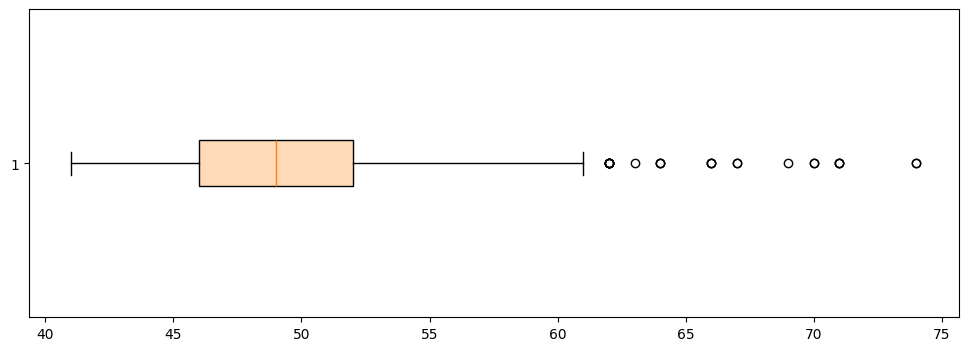

In [19]:
plt.figure(figsize=(12,4))

plt.boxplot(
    merged_df['heart_rate'],
    orientation="horizontal",
    patch_artist=True,
    boxprops=dict(facecolor='peachpuff')
)
plt.show()

By seeing the boxplot above, probably the IQR method is not the best method to identify outliers, since it would identify outliers some values likes 65, 70 or 75.

For this reason, outliers will be detected if not contained in the following range: 30bpm - 100bpm.
100bpm represents a very unlikely value during sleep since the maximum recorded value is 74bpm.

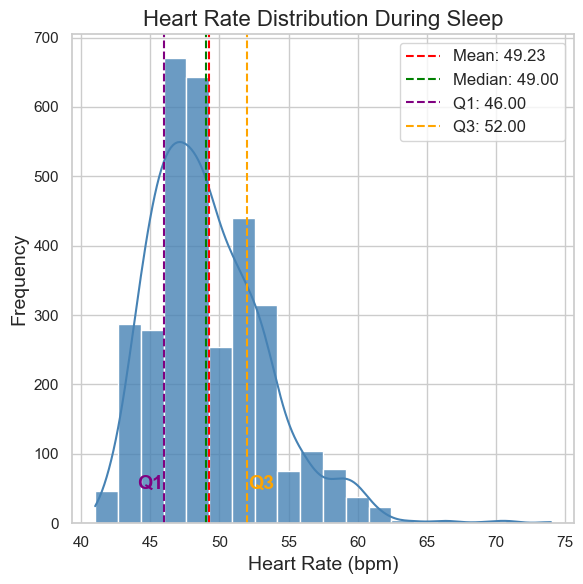

In [20]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")

sns.histplot(data=merged_df, x="heart_rate", kde=True, bins=20, color="steelblue", alpha=0.8)

plt.axvline(merged_df['heart_rate'].mean(), color='red', linestyle='--', label=f"Mean: {merged_df['heart_rate'].mean():.2f}")
plt.axvline(merged_df['heart_rate'].median(), color='green', linestyle='--', label=f"Median: {merged_df['heart_rate'].median():.2f}")

# IQR Range
q1 = merged_df['heart_rate'].quantile(0.25)
q3 = merged_df['heart_rate'].quantile(0.75)

# Plot 25th quantile and 75th quantile
plt.axvline(q1, color='purple', linestyle='--', label=f"Q1: {q1:.2f}")
plt.axvline(q3, color='orange', linestyle='--', label=f"Q3: {q3:.2f}")

plt.text(q1 - 1, 50, "Q1", color='purple', fontsize=14, fontweight="bold", ha='center')
plt.text(q3 + 1, 50, "Q3", color='orange', fontsize=14, fontweight="bold", ha='center')

plt.title("Heart Rate Distribution During Sleep", fontsize=16)
plt.xlabel("Heart Rate (bpm)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

The graph above shows that the heart rate is mainly concentrated around **49bpm**. <br>
Above **65bpm**, the data becomes much less frequent. <br>
The data appears to have a narrow range.

##### 4. Check for Duplicate Values

4.1) Check for duplicate values in the sleep stages datasets. <br>
     For each of these datasets, it is important to ensure that it does not contains duplicated row and, furthermore, that its time slots does not    intersect with each other. <br>
     For example: <br>

     start_time,end_time,heart_rate
     23:20,     23:45,   56
     23:30,     23:50,   60

This dataset is not valid since the two time slots intersect with each other.
     

In [21]:
def check_duplicates(directory):
    duplicates_report = {}
    
    for file in os.listdir(directory):
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)

            duplicates = df.duplicated(subset=['start_time', 'end_time']).sum()

            duplicates_report[file] = duplicates
    return duplicates_report

In [22]:
directory = "../../data/raw/sleep/stages"
duplicates_report = check_duplicates(directory)

for file, duplicates in duplicates_report.items():
    print(f"{file}: {duplicates} duplicated rows founded.")

2024-12-22.csv: 0 duplicated rows founded.
2024-12-23.csv: 0 duplicated rows founded.
2024-12-24.csv: 0 duplicated rows founded.
2024-12-25.csv: 0 duplicated rows founded.
2024-12-26.csv: 0 duplicated rows founded.
2024-12-27.csv: 0 duplicated rows founded.
2024-12-28.csv: 0 duplicated rows founded.
2024-12-29.csv: 0 duplicated rows founded.
2024-12-30.csv: 0 duplicated rows founded.
2024-12-31.csv: 0 duplicated rows founded.
2025-01-02.csv: 0 duplicated rows founded.
2025-01-03.csv: 0 duplicated rows founded.
2025-01-04.csv: 0 duplicated rows founded.
2025-01-05.csv: 0 duplicated rows founded.
2025-01-06.csv: 0 duplicated rows founded.


For these datasets, no duplicated row found.

In [23]:
def find_overlapping_intervals(directory):
    overlapping_report = {}

    for file in os.listdir(directory):
        if file.endswith(".csv"):
            file_path = os.path.join(directory, file)
            df = pd.read_csv(file_path)

            df['start_time'] = pd.to_datetime(df['start_time'], format="%H:%M")
            df['end_time'] = pd.to_datetime(df['end_time'], format="%H:%M")

            df = df.sort_values(by='start_time').reset_index(drop=True)

            overlaps = 0
            for i in range(len(df) - 1):
                if df.loc[i, 'end_time'] > df.loc[i + 1, 'start_time']:
                    overlaps += 1

            overlapping_report[file] = overlaps
    return overlapping_report

In [24]:
directory = "../../data/raw/sleep/stages"
overlapping_report = find_overlapping_intervals(directory)

for file, overlaps in overlapping_report.items():
    print(f"{file}: {overlaps} intersected time slots found.")

2024-12-22.csv: 0 intersected time slots found.
2024-12-23.csv: 0 intersected time slots found.
2024-12-24.csv: 0 intersected time slots found.
2024-12-25.csv: 0 intersected time slots found.
2024-12-26.csv: 0 intersected time slots found.
2024-12-27.csv: 0 intersected time slots found.
2024-12-28.csv: 0 intersected time slots found.
2024-12-29.csv: 0 intersected time slots found.
2024-12-30.csv: 0 intersected time slots found.
2024-12-31.csv: 0 intersected time slots found.
2025-01-02.csv: 0 intersected time slots found.
2025-01-03.csv: 0 intersected time slots found.
2025-01-04.csv: 0 intersected time slots found.
2025-01-05.csv: 0 intersected time slots found.
2025-01-06.csv: 0 intersected time slots found.


No intersected time slots found.

4.2) Check for duplicated timestamp in the sleep heart rate datasets.

In [25]:
def identify_timestamp_duplicates(directory):
    duplicate_report = {}

    for file in os.listdir(directory):
        if file.endswith('.csv'):
            file_path = os.path.join(directory, file)

            df = pd.read_csv(file_path)

            duplicate_count = df.duplicated(subset=['timestamp']).sum()

            duplicate_report[file] = duplicate_count

    return duplicate_report            

In [27]:
duplicated_timestamp = identify_timestamp_duplicates(heart_rates_sleep_directory)

for file, count in duplicated_timestamp.items():
    print(f"{file}: {count} duplicate timestamps")

2024-12-22.csv: 0 duplicate timestamps
2024-12-23.csv: 0 duplicate timestamps
2024-12-24.csv: 0 duplicate timestamps
2024-12-25.csv: 0 duplicate timestamps
2024-12-26.csv: 0 duplicate timestamps
2024-12-27.csv: 0 duplicate timestamps
2024-12-28.csv: 0 duplicate timestamps
2024-12-29.csv: 0 duplicate timestamps
2024-12-30.csv: 0 duplicate timestamps
2024-12-31.csv: 0 duplicate timestamps
2025-01-02.csv: 0 duplicate timestamps
2025-01-03.csv: 0 duplicate timestamps
2025-01-04.csv: 0 duplicate timestamps
2025-01-05.csv: 0 duplicate timestamps
2025-01-06.csv: 0 duplicate timestamps


No duplicated timestamp found. 

##### 5) Intersection of the two datasets

For each day, the goal is to intersect the sleep stage dataset and the nighttime heart rate dataset.<br>

Example:<br>

`timestamp`, `heart_rate`, `sleep_stage` <br>
00:58,        58,         Deep<br>
01:00,        60,         Light<br>
01:02,        55,         Light<br>
01:04,        56,         Light<br>
01:06,        52,         Light<br>

Test this strategy with a sample day: 2024-12-27

In [28]:
sample_day = '2024-12-27.csv'

sleep_stage_file = os.path.join(stages_sleep_directory, sample_day)
heart_rates_file = os.path.join(heart_rates_sleep_directory, sample_day)

sleep_stage_df = pd.read_csv(sleep_stage_file)
heart_rates_df = pd.read_csv(heart_rates_file)

In [30]:
sleep_stage_df.head()

,start_time,end_time,sleep_stage
0,00:59,01:03,Light
1,01:03,01:24,Deep
2,01:24,01:29,Light
3,01:29,01:35,Deep
4,01:35,02:41,Light


In [31]:
heart_rates_df.head()

,heart_rate,timestamp
0,54,00:58
1,53,01:00
2,53,01:02
3,54,01:04
4,54,01:06


In [40]:
sleep_stage_df['start_time'] = pd.to_datetime(sleep_stage_df['start_time'], format="%H:%M")
sleep_stage_df['end_time'] = pd.to_datetime(sleep_stage_df['end_time'], format="%H:%M")

heart_rates_df['timestamp'] = pd.to_datetime(heart_rates_df['timestamp'], format="%H:%M")

for idx, row in heart_rates_df.iterrows():
    timestamp = row['timestamp']

    for idx2, row2 in sleep_stage_df.iterrows():
        matching_stage = sleep_stage_df[(sleep_stage_df['start_time'] <= timestamp) & (sleep_stage_df['end_time'] > timestamp)]
        sleep_stage = matching_stage['sleep_stage'].iloc[0] if not matching_stage.empty else None

    # print(str(timestamp) + ' --> ' + str(sleep_stage))

Generalize the process using OOP.

In [66]:
class MergeDatasets:
    def __init__(self, dir1, dir2, output_dir):
        """
        Initialize input and output directories.
        
        Args:
            dir1 (str): Directory containing heart rate datasets.
            dir2 (str): Directory containing sleep stage datasets.
            output_dir (str): Directory to save the merged datasets.
        """
        self.dir1 = dir1
        self.dir2 = dir2
        self.output_dir = output_dir
        
        if not os.path.exists(self.dir1):
            print(f"Error: {self.dir1} does not exist")
            raise FileNotFoundError(f"{self.dir1} does not exist")
        if not os.path.exists(self.dir2):
            print(f"Error: {self.dir2} does not exist")
            raise FileNotFoundError(f"{self.dir2} does not exist")

        try:
            os.makedirs(self.output_dir, exist_ok=True)
        except PermissionError:
            print(f"Error: You do not have permission to create or write to the directory {self.output_dir}")
            raise PermissionError(f"Permission denied to {self.output_dir}")

    def list_csv_files(self, directory):
        """
        Returns the list of files in a directory.

        Args:
            directory (str): Directory to read files from.

        Returns:
            list: List of CSV files present in the directory.
        """
        try:
            if not os.path.exists(directory):
                print(f"Error: {self.directory} does not exist.")
                raise FileNotFoundError(f"{self.directory} does not exist")

            files = [f for f in os.listdir(directory) if f.endswith('.csv')]

            if not files:
                print(f"No CSV file found within {self.directory}")
                return []

            return files

        except PermissionError:
            print(f"Error: You do not have permission to access the directory {self.directory}")
            raise PermissionError(f"No permissions to access {self.directory}")

        except Exception as e:
            print(f"Error: {str(e)}")
            raise

    def match_files(self):
        """
        Matches files from dir1 with those in dir2 based on their names.

        Returns:
            list: List of tuples (file_dir1, file_dir2) for matching files.
        """
        try:
            files_dir1 = self.list_csv_files(self.dir1)
            files_dir2 = self.list_csv_files(self.dir2)

            matched_files = [(f, f) for f in files_dir1 if f in files_dir2]

            if not matched_files:
                print("Warning: No matching files found between the two directories.")
                return []

            return matched_files

        except Exception as e:
            print(f"Unexpected error while matching files: {str(e)}")
            raise

    def read_file(self, file_path):
        """
        Reads a CSV file and returns it as a DataFrame.

        Args:
            file_path (str): Path to the CSV file.

        Returns:
            pd.DataFrame: The loaded DataFrame.
        """
        try:
            if not os.path.exists(file_path):
                print(f"Error: File {file_path} does not exist.")
                raise FileNotFoundError(f"File {file_path} does not exist.")

            df = pd.read_csv(file_path)

            if df.empty:
                print(f"Warning: File {file_path} is empty.")

            return df

        except Exception as e:
            print(f"Unexpected error while reading the file {file_path}: {str(e)}")
            raise
        
    def convert_to_datetime(self, df, columns):
        """
        Converts specified columns in a DataFrame to datetime format.

        Args:
            df (pd.DataFrame): DataFrame to process.
            columns (list): List of column names to convert.

        Returns:
            pd.DataFrame: DataFrame with specified columns converted to datetime.
        """
        try:
            for col in columns:
                if col not in df.columns:
                    print(f"Error: Column '{col}' does not exist in the DataFrame.")
                    raise KeyError(f"Column '{col}' does not exist in the DataFrame.")
                df[col] = pd.to_datetime(df[col], format='%H:%M').dt.time

            return df

        except Exception as e:
            print(f"Unexpected error while converting columns to datetime: {str(e)}")
            raise

    def merge_two_datasets(self, df1, df2):
        """
        Merges two DataFrames

        Args:
            df1 (pd.DataFrame): First DataFrame.
            df2 (pd.DataFrame): Second DataFrame.

        Returns:
            pd.DataFrame: Merged DataFrame.
        """
        try:
            required_columns_df1 = ['timestamp']
            required_columns_df2 = ['start_time', 'end_time', 'sleep_stage']

            for col in required_columns_df1:
                if col not in df1.columns:
                    print(f"Error: Column '{col}' is missing from the first DataFrame.")
                    raise KeyError(f"Column '{col}' is missing from the first DataFrame.")

            for col in required_columns_df2:
                if col not in df2.columns:
                    print(f"Error: Column '{col}' is missing from the second DataFrame.")
                    raise KeyError(f"Column '{col}' is missing from the second DataFrame.")

            def get_sleep_stage(row):
                match = df2[
                    (df2['start_time'] <= row['timestamp']) &
                    (df2['end_time'] > row['timestamp'])
                ]
                return match['sleep_stage'].iloc[0] if not match.empty else None

            df1['sleep_stage'] = df1.apply(get_sleep_stage, axis=1)

            return df1

        except Exception as e:
            print(f"Unexpected error while merging datasets: {str(e)}")
            raise

    def split_overlapping_timeslots(self, df):
        """
        Splits time slots that overlap midnight into two parts.
    
        Args:
            df (pd.DataFrame): DataFrame containing 'start_time', 'end_time', and 'sleep_stage'.
    
        Returns:
            pd.DataFrame: Modified DataFrame with overlapping time slots split.
        """
        try:
            overlapping_rows = df[df['end_time'] < df['start_time']]

            new_rows = []

            for _, row in overlapping_rows.iterrows():
                 new_rows.append({
                    'start_time': row['start_time'],
                    'end_time': pd.Timestamp("23:59").time(),
                    'sleep_stage': row['sleep_stage']
                 })
                 new_rows.append({
                    'start_time': pd.Timestamp("00:00").time(),
                    'end_time': row['end_time'],
                    'sleep_stage': row['sleep_stage']
                })

            df = df.drop(overlapping_rows.index)

            df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

            df = df.sort_values(by='start_time').reset_index(drop=True)

            return df

        except Exception as e:
            print(f"Unexpected error during time slot splitting: {str(e)}")
            raise
    
    def save_merged_dataset(self, merged_df, file_name):
        """
        Saves the merged dataset to the output directory after removing rows with NaN in 'sleep_stage'.

        Args:
            merged_df (pd.DataFrame): The merged dataset.
            file_name (str): Name of the file to save.

        Returns:
            None
        """
        try:
            # cleaned_df = merged_df.dropna(subset=['sleep_stage'])

            # if cleaned_df.empty:
            #     print(f"Warning: The dataset {file_name} is empty after removing NaN values. Skipping save.")
            #     return

            output_path = os.path.join(self.output_dir, file_name)

            merged_df.to_csv(output_path, index=False)
            print(f"File saved successfully: {output_path}")

        except PermissionError:
            print(f"Error: You do not have permission to save the file {file_name} in the directory {self.output_dir}.")
            raise PermissionError(f"Missing permissions to save the file {file_name} in {self.output_dir}.")

        except Exception as e:
            print(f"Unexpected error while saving the file {file_name}: {str(e)}")
            raise 
    

    def process_all(self):
        print("Test")
        file_pairs = self.match_files()
        for file1, file2 in file_pairs:
            df1 = self.read_file(os.path.join(self.dir1, file1))
            df2 = self.read_file(os.path.join(self.dir2, file2))

            df1 = self.convert_to_datetime(df1, ['timestamp'])
            df2 = self.convert_to_datetime(df2, ['start_time', 'end_time'])

            df2 = self.split_overlapping_timeslots(df2)

            merged_df = self.merge_two_datasets(df1, df2)
            
            self.save_merged_dataset(merged_df, file1)

output_dir = "../../data/cleaned/sleep"
merge_datasets = MergeDatasets(heart_rates_sleep_directory, stages_sleep_directory, output_dir)
merge_datasets.process_all()

Test
File saved successfully: ../../data/cleaned/sleep\2024-12-22.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-23.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-24.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-25.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-26.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-27.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-28.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-29.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-30.csv
File saved successfully: ../../data/cleaned/sleep\2024-12-31.csv
File saved successfully: ../../data/cleaned/sleep\2025-01-02.csv
File saved successfully: ../../data/cleaned/sleep\2025-01-03.csv
File saved successfully: ../../data/cleaned/sleep\2025-01-04.csv
File saved successfully: ../../data/cleaned/sleep\2025-01-05.csv
File saved successfully: ../../data/cleaned/sleep\2025-01-06.csv
